In [24]:

import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns #for visualization
import nltk

nlp = spacy.load('en_core_web_lg')


  Using cached https://files.pythonhosted.org/packages/f6/1d/d925cfb4f324ede997f6d47bea4d9babba51b49e87a767c170b77005889d/nltk-3.4.5.zip
  Stored in directory: /Users/mbaka/Library/Caches/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


##  The data extracted from https://cloud.webscraper.io/ advanced twitter feed

In [114]:
tweets = pd.read_csv("Twitter Advanced Search (1).csv")
tweetts = pd.read_csv("Twitter Advanced Search.csv")



# Using regex to clean the text by removing URLs and other text referred to as noise

In [115]:
text = tweets['content'].str.cat(sep=' ')


# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

doc = nlp(text)



# Using seaborn for visualization of the most recurring words

## We can see South Africa and Xenophobia among the highest count, but we already know that this is the topic of disccusion so they can be excluded from the analysis.

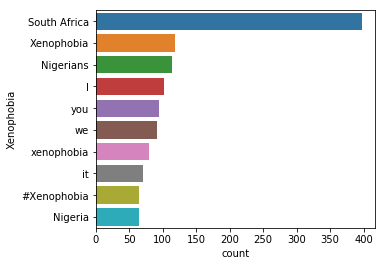

In [116]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

df_nouns = pd.DataFrame(items_of_interest, columns=["Xenophobia"])

plt.figure(figsize=(5,4))
sns.countplot(y="Xenophobia",
             data=df_nouns,
             order=df_nouns["Xenophobia"].value_counts().iloc[:10].index)
plt.show()

# Let's remove these filler words and try again

### As can be seen, the stop and filler words have been extracted and the plot shows that the conversation is now centered on violence, foreigners and countries.

### An important thing to note Nigeria was excluded from the second plot. This could be because SpaCy does not recognize Nigeria as a Noun and excluded it from the analysis. However this also highlights that a majority of conversation on Xenophobia between 2018 and 2019 were more focused on Nigerians.

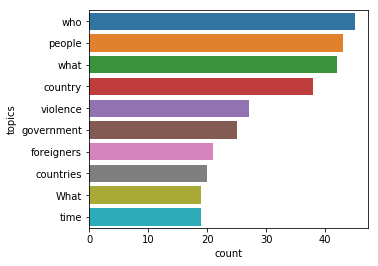

In [117]:

trump_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        trump_topics.append(token)
        
trump_topics = [str(x) for x in trump_topics]

def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

trump_topics = remove_values_from_list(trump_topics, "South Africa")
trump_topics = remove_values_from_list(trump_topics, "South Africans")
trump_topics = remove_values_from_list(trump_topics, "Africa")
trump_topics = remove_values_from_list(trump_topics, "Africans")
trump_topics = remove_values_from_list(trump_topics, "Xenophobia")
trump_topics = remove_values_from_list(trump_topics, "xenophobia")

#print (x)


df_ttopics = pd.DataFrame(trump_topics, columns=["topics"])
plt.figure(figsize=(5,4))
sns.countplot(y="topics",
             data=df_ttopics,
             order=df_ttopics["topics"].value_counts().iloc[1:11].index)
plt.show()
# from collections import Counter
# item_counter = Counter(items_of_interest)
# item_counter.most_common()

## This is just a word cloud highlighting the scope of the conversation of Xenophobia in SA

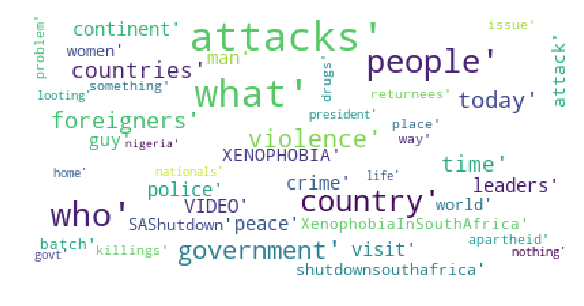

In [118]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(trump_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Below is a list of the top most hashtags used under this topic.

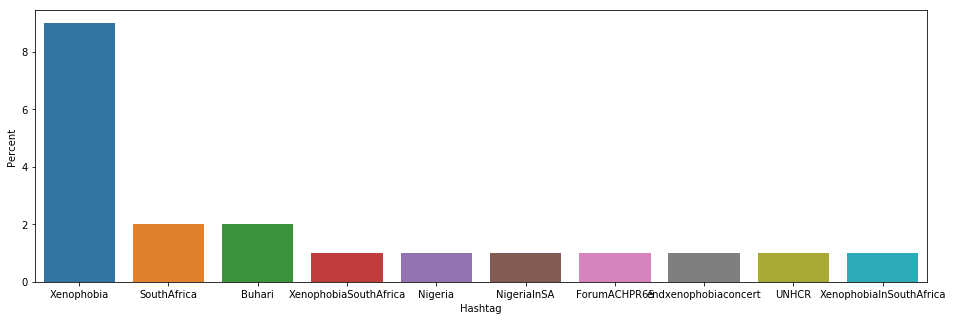

In [123]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_regular = hashtag_extract(tweetts['content'])

HT_regular = sum(HT_regular,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Percent': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Percent", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Percent")
ax.set(ylabel = 'Percent')
plt.show()